## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  78.449260   638.583763  0.128386   6.094545  0.863244
1  87.852693   433.323016  0.329875   5.874155  0.957392
2  97.761672  1108.906386  0.206070   9.130346  1.257799
3  96.332572   228.437754  0.039084  10.522356  0.159779
4  89.213906   353.499391  0.539052   5.892517  1.045023


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu
epoch 0  | loss: 0.96147 | train_mse: 9.61871 | train_mae: 2.06235 |  0:00:00s


epoch 1  | loss: 0.59197 | train_mse: 11.57227| train_mae: 2.00133 |  0:00:00s
epoch 2  | loss: 0.4346  | train_mse: 4.27452 | train_mae: 1.31627 |  0:00:00s
epoch 3  | loss: 0.49437 | train_mse: 1.63444 | train_mae: 0.89279 |  0:00:00s


epoch 4  | loss: 0.31533 | train_mse: 1.42854 | train_mae: 0.84378 |  0:00:00s
epoch 5  | loss: 0.29805 | train_mse: 1.1435  | train_mae: 0.79906 |  0:00:00s
epoch 6  | loss: 0.33129 | train_mse: 0.62837 | train_mae: 0.6234  |  0:00:00s


epoch 7  | loss: 0.21515 | train_mse: 0.60696 | train_mae: 0.54562 |  0:00:00s
epoch 8  | loss: 0.27876 | train_mse: 0.611   | train_mae: 0.56879 |  0:00:00s
epoch 9  | loss: 0.59976 | train_mse: 0.76002 | train_mae: 0.64177 |  0:00:00s
epoch 10 | loss: 0.31372 | train_mse: 0.66466 | train_mae: 0.5964  |  0:00:00s


epoch 11 | loss: 0.47485 | train_mse: 0.91475 | train_mae: 0.6864  |  0:00:01s
epoch 12 | loss: 0.22332 | train_mse: 0.81312 | train_mae: 0.64497 |  0:00:01s


epoch 13 | loss: 0.30887 | train_mse: 0.70509 | train_mae: 0.59499 |  0:00:01s
epoch 14 | loss: 0.2953  | train_mse: 0.59221 | train_mae: 0.55201 |  0:00:01s


epoch 15 | loss: 0.26205 | train_mse: 0.56643 | train_mae: 0.5196  |  0:00:01s
epoch 16 | loss: 0.17309 | train_mse: 0.444   | train_mae: 0.48272 |  0:00:01s
epoch 17 | loss: 0.13945 | train_mse: 0.39652 | train_mae: 0.46877 |  0:00:01s


epoch 18 | loss: 0.37787 | train_mse: 0.5495  | train_mae: 0.48387 |  0:00:01s
epoch 19 | loss: 0.41056 | train_mse: 0.53319 | train_mae: 0.49684 |  0:00:01s


epoch 20 | loss: 0.32167 | train_mse: 0.39209 | train_mae: 0.42854 |  0:00:01s
epoch 21 | loss: 0.23796 | train_mse: 0.31302 | train_mae: 0.40692 |  0:00:01s
epoch 22 | loss: 0.30519 | train_mse: 0.4288  | train_mae: 0.46642 |  0:00:02s


epoch 23 | loss: 0.24085 | train_mse: 0.19694 | train_mae: 0.32755 |  0:00:02s
epoch 24 | loss: 0.18267 | train_mse: 0.22076 | train_mae: 0.33648 |  0:00:02s
epoch 25 | loss: 0.17087 | train_mse: 0.24737 | train_mae: 0.3505  |  0:00:02s


epoch 26 | loss: 0.39396 | train_mse: 0.24956 | train_mae: 0.3524  |  0:00:02s
epoch 27 | loss: 0.20707 | train_mse: 0.21202 | train_mae: 0.3263  |  0:00:02s


epoch 28 | loss: 0.25818 | train_mse: 0.20098 | train_mae: 0.33479 |  0:00:02s


epoch 29 | loss: 0.17801 | train_mse: 0.20246 | train_mae: 0.33159 |  0:00:02s
epoch 30 | loss: 0.18861 | train_mse: 0.18539 | train_mae: 0.3305  |  0:00:03s
epoch 31 | loss: 0.18982 | train_mse: 0.149   | train_mae: 0.29599 |  0:00:03s


epoch 32 | loss: 0.14629 | train_mse: 0.15262 | train_mae: 0.29856 |  0:00:03s
epoch 33 | loss: 0.17807 | train_mse: 0.14336 | train_mae: 0.29298 |  0:00:03s
epoch 34 | loss: 0.24885 | train_mse: 0.15344 | train_mae: 0.30368 |  0:00:03s
epoch 35 | loss: 0.14938 | train_mse: 0.16913 | train_mae: 0.31796 |  0:00:03s


epoch 36 | loss: 0.16757 | train_mse: 0.14857 | train_mae: 0.2874  |  0:00:03s
epoch 37 | loss: 0.16412 | train_mse: 0.15557 | train_mae: 0.29413 |  0:00:03s
epoch 38 | loss: 0.23338 | train_mse: 0.13827 | train_mae: 0.28318 |  0:00:03s
epoch 39 | loss: 0.09006 | train_mse: 0.14466 | train_mae: 0.29528 |  0:00:03s


epoch 40 | loss: 0.20813 | train_mse: 0.14787 | train_mae: 0.30083 |  0:00:03s
epoch 41 | loss: 0.10642 | train_mse: 0.11824 | train_mae: 0.25683 |  0:00:03s
epoch 42 | loss: 0.13807 | train_mse: 0.09773 | train_mae: 0.23567 |  0:00:03s


epoch 43 | loss: 0.19635 | train_mse: 0.07913 | train_mae: 0.20749 |  0:00:03s
epoch 44 | loss: 0.11533 | train_mse: 0.07969 | train_mae: 0.21357 |  0:00:04s
epoch 45 | loss: 0.12886 | train_mse: 0.0895  | train_mae: 0.22553 |  0:00:04s
epoch 46 | loss: 0.1637  | train_mse: 0.10801 | train_mae: 0.24296 |  0:00:04s


epoch 47 | loss: 0.29934 | train_mse: 0.17576 | train_mae: 0.29649 |  0:00:04s
epoch 48 | loss: 0.32285 | train_mse: 0.22273 | train_mae: 0.33332 |  0:00:04s
epoch 49 | loss: 0.15751 | train_mse: 0.13287 | train_mae: 0.2691  |  0:00:04s
epoch 50 | loss: 0.15928 | train_mse: 0.10377 | train_mae: 0.25733 |  0:00:04s


epoch 51 | loss: 0.13316 | train_mse: 0.09066 | train_mae: 0.23676 |  0:00:04s
epoch 52 | loss: 0.12474 | train_mse: 0.09763 | train_mae: 0.24139 |  0:00:04s
epoch 53 | loss: 0.11348 | train_mse: 0.08409 | train_mae: 0.23403 |  0:00:04s
epoch 54 | loss: 0.14554 | train_mse: 0.08981 | train_mae: 0.24073 |  0:00:04s


epoch 55 | loss: 0.18214 | train_mse: 0.09114 | train_mae: 0.24054 |  0:00:04s
epoch 56 | loss: 0.16038 | train_mse: 0.09492 | train_mae: 0.2389  |  0:00:04s
epoch 57 | loss: 0.11534 | train_mse: 0.07114 | train_mae: 0.2027  |  0:00:04s


epoch 58 | loss: 0.09859 | train_mse: 0.07345 | train_mae: 0.21176 |  0:00:04s
epoch 59 | loss: 0.1735  | train_mse: 0.10673 | train_mae: 0.26247 |  0:00:05s
epoch 60 | loss: 0.21051 | train_mse: 0.08511 | train_mae: 0.23354 |  0:00:05s
epoch 61 | loss: 0.18458 | train_mse: 0.08036 | train_mae: 0.22663 |  0:00:05s


epoch 62 | loss: 0.25387 | train_mse: 0.08332 | train_mae: 0.23019 |  0:00:05s
epoch 63 | loss: 0.18129 | train_mse: 0.07193 | train_mae: 0.2153  |  0:00:05s
epoch 64 | loss: 0.11753 | train_mse: 0.08302 | train_mae: 0.21279 |  0:00:05s
epoch 65 | loss: 0.11322 | train_mse: 0.11519 | train_mae: 0.24187 |  0:00:05s


epoch 66 | loss: 0.10844 | train_mse: 0.13015 | train_mae: 0.25299 |  0:00:05s
epoch 67 | loss: 0.13475 | train_mse: 0.1198  | train_mae: 0.24771 |  0:00:05s
epoch 68 | loss: 0.21478 | train_mse: 0.10155 | train_mae: 0.241   |  0:00:05s
epoch 69 | loss: 0.12038 | train_mse: 0.09256 | train_mae: 0.23488 |  0:00:05s


epoch 70 | loss: 0.19034 | train_mse: 0.08244 | train_mae: 0.21866 |  0:00:05s
epoch 71 | loss: 0.09726 | train_mse: 0.08313 | train_mae: 0.21206 |  0:00:05s
epoch 72 | loss: 0.15883 | train_mse: 0.11667 | train_mae: 0.24957 |  0:00:05s


epoch 73 | loss: 0.1031  | train_mse: 0.12199 | train_mae: 0.25193 |  0:00:06s
epoch 74 | loss: 0.12175 | train_mse: 0.11105 | train_mae: 0.23888 |  0:00:06s
epoch 75 | loss: 0.13908 | train_mse: 0.10697 | train_mae: 0.24223 |  0:00:06s
epoch 76 | loss: 0.14492 | train_mse: 0.09395 | train_mae: 0.23475 |  0:00:06s


epoch 77 | loss: 0.1283  | train_mse: 0.08792 | train_mae: 0.23146 |  0:00:06s
epoch 78 | loss: 0.09943 | train_mse: 0.08753 | train_mae: 0.2326  |  0:00:06s
epoch 79 | loss: 0.13848 | train_mse: 0.1126  | train_mae: 0.26828 |  0:00:06s
epoch 80 | loss: 0.14295 | train_mse: 0.11975 | train_mae: 0.26899 |  0:00:06s


epoch 81 | loss: 0.35374 | train_mse: 0.11364 | train_mae: 0.26624 |  0:00:06s
epoch 82 | loss: 0.15271 | train_mse: 0.0911  | train_mae: 0.23377 |  0:00:06s
epoch 83 | loss: 0.13029 | train_mse: 0.08755 | train_mae: 0.23227 |  0:00:06s
epoch 84 | loss: 0.14377 | train_mse: 0.12655 | train_mae: 0.27743 |  0:00:06s


epoch 85 | loss: 0.12887 | train_mse: 0.1479  | train_mae: 0.29221 |  0:00:06s
epoch 86 | loss: 0.17309 | train_mse: 0.1186  | train_mae: 0.26961 |  0:00:06s
epoch 87 | loss: 0.17677 | train_mse: 0.09778 | train_mae: 0.24922 |  0:00:06s


epoch 88 | loss: 0.22402 | train_mse: 0.09006 | train_mae: 0.23989 |  0:00:07s
epoch 89 | loss: 0.10313 | train_mse: 0.07756 | train_mae: 0.22439 |  0:00:07s
epoch 90 | loss: 0.1584  | train_mse: 0.08094 | train_mae: 0.22791 |  0:00:07s
epoch 91 | loss: 0.13397 | train_mse: 0.0976  | train_mae: 0.25385 |  0:00:07s


epoch 92 | loss: 0.12667 | train_mse: 0.10393 | train_mae: 0.25725 |  0:00:07s
epoch 93 | loss: 0.11548 | train_mse: 0.12488 | train_mae: 0.26593 |  0:00:07s
epoch 94 | loss: 0.12773 | train_mse: 0.10599 | train_mae: 0.24491 |  0:00:07s
epoch 95 | loss: 0.19059 | train_mse: 0.07667 | train_mae: 0.21909 |  0:00:07s


epoch 96 | loss: 0.12631 | train_mse: 0.06925 | train_mae: 0.21296 |  0:00:07s
epoch 97 | loss: 0.09836 | train_mse: 0.07075 | train_mae: 0.21247 |  0:00:07s
epoch 98 | loss: 0.13576 | train_mse: 0.06474 | train_mae: 0.20192 |  0:00:07s
epoch 99 | loss: 0.09083 | train_mse: 0.05851 | train_mae: 0.19521 |  0:00:07s


epoch 100| loss: 0.08027 | train_mse: 0.06574 | train_mae: 0.2055  |  0:00:07s
epoch 101| loss: 0.11798 | train_mse: 0.0644  | train_mae: 0.20929 |  0:00:07s
epoch 102| loss: 0.08789 | train_mse: 0.06998 | train_mae: 0.21355 |  0:00:07s
epoch 103| loss: 0.13122 | train_mse: 0.08757 | train_mae: 0.2368  |  0:00:08s


epoch 104| loss: 0.13325 | train_mse: 0.11064 | train_mae: 0.25798 |  0:00:08s
epoch 105| loss: 0.09708 | train_mse: 0.13538 | train_mae: 0.27897 |  0:00:08s
epoch 106| loss: 0.14326 | train_mse: 0.16134 | train_mae: 0.2939  |  0:00:08s
epoch 107| loss: 0.13023 | train_mse: 0.18004 | train_mae: 0.30663 |  0:00:08s


epoch 108| loss: 0.13637 | train_mse: 0.14073 | train_mae: 0.27251 |  0:00:08s
epoch 109| loss: 0.12238 | train_mse: 0.11153 | train_mae: 0.23867 |  0:00:08s
epoch 110| loss: 0.14782 | train_mse: 0.09146 | train_mae: 0.21812 |  0:00:08s
epoch 111| loss: 0.0845  | train_mse: 0.0893  | train_mae: 0.22073 |  0:00:08s


epoch 112| loss: 0.12538 | train_mse: 0.07998 | train_mae: 0.21216 |  0:00:08s
epoch 113| loss: 0.14107 | train_mse: 0.07485 | train_mae: 0.21016 |  0:00:08s
epoch 114| loss: 0.13437 | train_mse: 0.05366 | train_mae: 0.18308 |  0:00:08s


epoch 115| loss: 0.05954 | train_mse: 0.08098 | train_mae: 0.2304  |  0:00:08s
epoch 116| loss: 0.10647 | train_mse: 0.10309 | train_mae: 0.25672 |  0:00:08s
epoch 117| loss: 0.16957 | train_mse: 0.09111 | train_mae: 0.23922 |  0:00:08s
epoch 118| loss: 0.08776 | train_mse: 0.0501  | train_mae: 0.18026 |  0:00:09s


epoch 119| loss: 0.0804  | train_mse: 0.04581 | train_mae: 0.17327 |  0:00:09s
epoch 120| loss: 0.09973 | train_mse: 0.056   | train_mae: 0.19149 |  0:00:09s
epoch 121| loss: 0.11009 | train_mse: 0.0786  | train_mae: 0.2233  |  0:00:09s
epoch 122| loss: 0.10209 | train_mse: 0.10176 | train_mae: 0.24976 |  0:00:09s


epoch 123| loss: 0.11559 | train_mse: 0.07654 | train_mae: 0.22036 |  0:00:09s
epoch 124| loss: 0.15328 | train_mse: 0.06343 | train_mae: 0.20252 |  0:00:09s
epoch 125| loss: 0.18531 | train_mse: 0.05511 | train_mae: 0.19323 |  0:00:09s
epoch 126| loss: 0.08757 | train_mse: 0.04918 | train_mae: 0.18109 |  0:00:09s


epoch 127| loss: 0.30178 | train_mse: 0.05024 | train_mae: 0.18252 |  0:00:09s
epoch 128| loss: 0.08842 | train_mse: 0.05176 | train_mae: 0.17912 |  0:00:09s
epoch 129| loss: 0.10476 | train_mse: 0.05197 | train_mae: 0.1835  |  0:00:09s
epoch 130| loss: 0.13082 | train_mse: 0.04955 | train_mae: 0.17925 |  0:00:09s


epoch 131| loss: 0.12675 | train_mse: 0.04571 | train_mae: 0.16891 |  0:00:09s
epoch 132| loss: 0.08617 | train_mse: 0.05002 | train_mae: 0.17663 |  0:00:09s
epoch 133| loss: 0.08343 | train_mse: 0.06565 | train_mae: 0.19456 |  0:00:10s
epoch 134| loss: 0.21888 | train_mse: 0.10322 | train_mae: 0.2373  |  0:00:10s


epoch 135| loss: 0.11695 | train_mse: 0.09392 | train_mae: 0.22888 |  0:00:10s
epoch 136| loss: 0.12144 | train_mse: 0.08145 | train_mae: 0.22536 |  0:00:10s
epoch 137| loss: 0.19074 | train_mse: 0.08294 | train_mae: 0.22498 |  0:00:10s
epoch 138| loss: 0.07474 | train_mse: 0.08616 | train_mae: 0.23513 |  0:00:10s


epoch 139| loss: 0.08019 | train_mse: 0.07707 | train_mae: 0.21922 |  0:00:10s
epoch 140| loss: 0.10259 | train_mse: 0.06828 | train_mae: 0.19969 |  0:00:10s
epoch 141| loss: 0.12453 | train_mse: 0.075   | train_mae: 0.21183 |  0:00:10s
epoch 142| loss: 0.08225 | train_mse: 0.06321 | train_mae: 0.19578 |  0:00:10s


epoch 143| loss: 0.12231 | train_mse: 0.05642 | train_mae: 0.18764 |  0:00:10s
epoch 144| loss: 0.08779 | train_mse: 0.05509 | train_mae: 0.19061 |  0:00:10s
epoch 145| loss: 0.09092 | train_mse: 0.05547 | train_mae: 0.19084 |  0:00:10s


epoch 146| loss: 0.11757 | train_mse: 0.05893 | train_mae: 0.19011 |  0:00:10s
epoch 147| loss: 0.09957 | train_mse: 0.06009 | train_mae: 0.18647 |  0:00:10s
epoch 148| loss: 0.06839 | train_mse: 0.07184 | train_mae: 0.20427 |  0:00:11s
epoch 149| loss: 0.10547 | train_mse: 0.09519 | train_mae: 0.22831 |  0:00:11s


epoch 150| loss: 0.11015 | train_mse: 0.09754 | train_mae: 0.2381  |  0:00:11s
epoch 151| loss: 0.12366 | train_mse: 0.0751  | train_mae: 0.21502 |  0:00:11s
epoch 152| loss: 0.11426 | train_mse: 0.06565 | train_mae: 0.21061 |  0:00:11s


epoch 153| loss: 0.11634 | train_mse: 0.06914 | train_mae: 0.21957 |  0:00:11s
epoch 154| loss: 0.0821  | train_mse: 0.06482 | train_mae: 0.2098  |  0:00:11s
epoch 155| loss: 0.1451  | train_mse: 0.05049 | train_mae: 0.18696 |  0:00:11s
epoch 156| loss: 0.08964 | train_mse: 0.05506 | train_mae: 0.18323 |  0:00:11s


epoch 157| loss: 0.09529 | train_mse: 0.045   | train_mae: 0.16921 |  0:00:11s
epoch 158| loss: 0.05912 | train_mse: 0.05024 | train_mae: 0.17271 |  0:00:11s
epoch 159| loss: 0.10321 | train_mse: 0.05668 | train_mae: 0.18383 |  0:00:11s


epoch 160| loss: 0.12223 | train_mse: 0.06809 | train_mae: 0.19316 |  0:00:11s
epoch 161| loss: 0.17743 | train_mse: 0.09659 | train_mae: 0.22331 |  0:00:11s
epoch 162| loss: 0.13535 | train_mse: 0.11069 | train_mae: 0.23874 |  0:00:11s
epoch 163| loss: 0.22064 | train_mse: 0.11479 | train_mae: 0.24934 |  0:00:12s


epoch 164| loss: 0.1285  | train_mse: 0.11983 | train_mae: 0.25412 |  0:00:12s
epoch 165| loss: 0.15979 | train_mse: 0.10626 | train_mae: 0.23765 |  0:00:12s
epoch 166| loss: 0.13018 | train_mse: 0.0995  | train_mae: 0.22885 |  0:00:12s
epoch 167| loss: 0.18144 | train_mse: 0.08138 | train_mae: 0.20997 |  0:00:12s


epoch 168| loss: 0.11466 | train_mse: 0.05877 | train_mae: 0.18695 |  0:00:12s
epoch 169| loss: 0.08605 | train_mse: 0.05    | train_mae: 0.1832  |  0:00:12s
epoch 170| loss: 0.08082 | train_mse: 0.08038 | train_mae: 0.2174  |  0:00:12s


epoch 171| loss: 0.10926 | train_mse: 0.11356 | train_mae: 0.25107 |  0:00:12s
epoch 172| loss: 0.15072 | train_mse: 0.09371 | train_mae: 0.23884 |  0:00:12s
epoch 173| loss: 0.11487 | train_mse: 0.0618  | train_mae: 0.20752 |  0:00:12s
epoch 174| loss: 0.07285 | train_mse: 0.05232 | train_mae: 0.18807 |  0:00:12s


epoch 175| loss: 0.06522 | train_mse: 0.05723 | train_mae: 0.18345 |  0:00:12s
epoch 176| loss: 0.0669  | train_mse: 0.0671  | train_mae: 0.19373 |  0:00:12s
epoch 177| loss: 0.19076 | train_mse: 0.08579 | train_mae: 0.2185  |  0:00:13s
epoch 178| loss: 0.11476 | train_mse: 0.09848 | train_mae: 0.23602 |  0:00:13s


epoch 179| loss: 0.1194  | train_mse: 0.12759 | train_mae: 0.25971 |  0:00:13s
epoch 180| loss: 0.13584 | train_mse: 0.13867 | train_mae: 0.2675  |  0:00:13s
epoch 181| loss: 0.09335 | train_mse: 0.13745 | train_mae: 0.27348 |  0:00:13s

Early stopping occurred at epoch 181 with best_epoch = 131 and best_train_mae = 0.16891
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

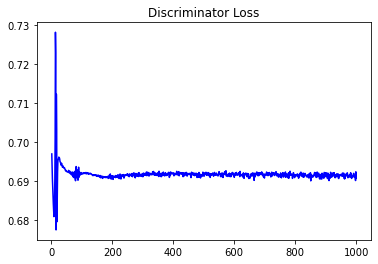

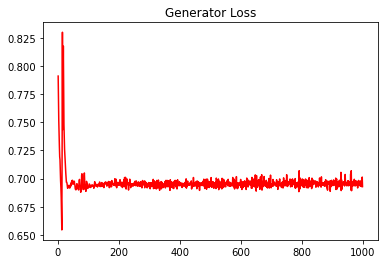

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2414895644266671


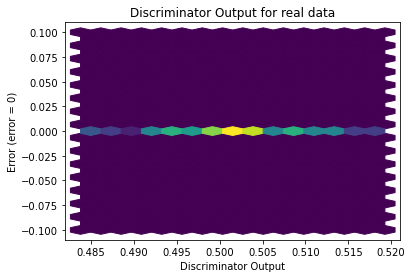

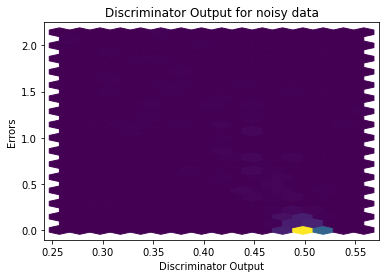

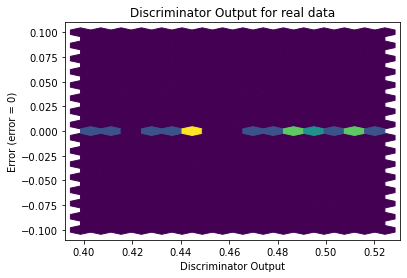

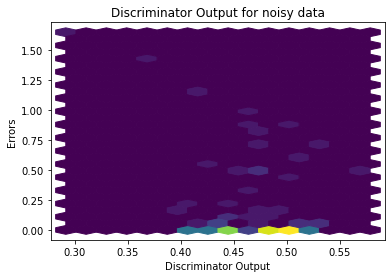

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


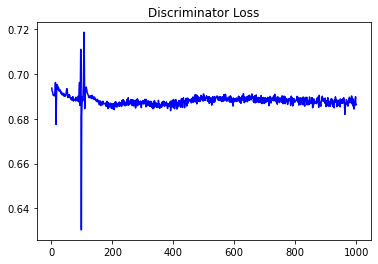

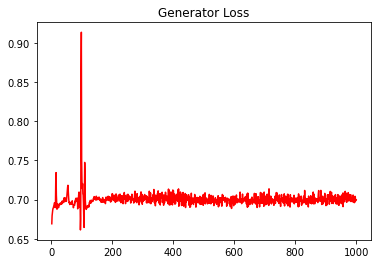

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2788473266622416


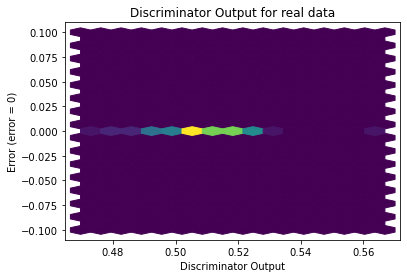

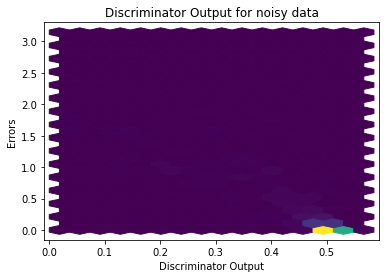

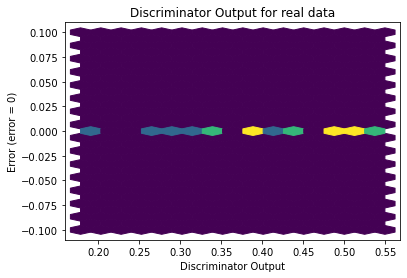

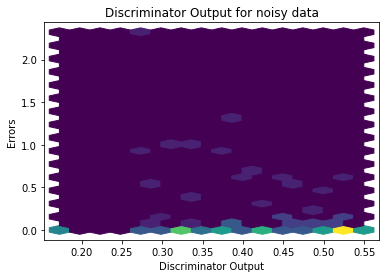

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1642]], requires_grad=True)
